<a href="https://colab.research.google.com/github/ibe-abu-chi/EXCEL-WORK/blob/main/Copy_of_CKD_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all libraries and data needed for this exercise
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
CKData = pd.read_excel('CKD_DATA.xlsx')
pd.set_option('max_columns', None)
#pd.set_option('max_rows', None)



In [ ]:
#viewing the head of the data set
CKData

,YEAR,CATEGORY_CODE,AGE,GENDER,RACE,AGE AT BIOPSY,ONSET TO BIOPSY TIME,M,E,S,T,C,IgAstain,IgGstain,IgMstain,C3STAIN,WEIGHT,HEIGHT,BMI,P_PROTEINURIA,P_HEMATURIA,P_HTN,P_EDEMA,P_AKI,P_ESRD,P_NS,C3,C4,C3C4R,URIC ACID,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,NLR,B_SBP,B_DBP,B_PP,B_MAP,24HRUPROTEIN,HEMATURIA,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,B_AZATHIOPRINE,Unnamed: 52,6_SBP,6_DBP,6_PP,6_MAP,6_PROTEINURIA,6_HEMATURIA,6_CREATININE,6_Egfr,6_UPCR,6_ACE,6_STEROID,6_IMMNU,6_AZATHIO,Unnamed: 66,1_SBP,1_DBP,1_PP,1_MAP,1_PROTEINURIA,HEMATURIA.1,1_creatinine,1_eGFR,1_UPCR,1_ACE,1_STEROID,1_CYTO,1_AZATHIOPRINE,Unnamed: 80,5_SBP,5_DBP,5_PROTEINURIA,5_HEMATURIA,5_CREATININE,5_eGFR,5_UPCR,Unnamed: 88,L_DATE,L_ACE,L_STEROID,L_CYTO,L_AZATHIOPRINE,L_SBP,L_DBP,L_PP,L_MAP,L_MAP.1,L_CRETININE,L_eGFR,L_HEMATURIA,L_PROTEINURIA,L_UPCR,Unnamed: 104,OUTCOME,FUT,Unnamed: 107
0,2012,12305,40,FEMALE,MELAYU,30,30,1,0.0,1,1,0.0,2+,1+,TRACE,NEG,73.0,1.53,31.18,1,0,1,0,0,0,0,NaN,NaN,NaN,NaN,71.0,35,3.78,12.5,311,11.9,6.33,2.87,2.2,139.0,96.0,43.0,110.0,1.40,NEG,121,53,0.11,1,0,0,0,NaN,115.0,72.0,43.0,86.000000,2+,NEG,119.0,54.0,0.26,NaN,0.0,0.0,0.0,NaN,151.0,109.0,42.0,123.0,2+,TRACE,119.0,54.0,0.26,1.0,0,0,0,NaN,109.0,65,NaN,2+,209,27,0.15,NaN,2022,1,0,0,0,113,72,41.0,86.0,110.0,803,5,-,-,0.67,NaN,ESRD,120,NaN
1,2012,4292,38,FEMALE,MELAYU,28,36,1,0.0,1,1,0.0,3+,TRACE,2+,2+,57.0,-,NaN,1,1,1,0,0,0,0,NaN,NaN,NaN,362.0,68.0,33,NaN,11.7,413,10.7,7.74,1.91,4.1,120.0,81.0,39.0,94.0,1.34,2+,82,86,0.40,0,0,0,0,NaN,129.0,80.0,49.0,96.000000,TRACE,TRACE,123.0,53.0,0.04,1.0,0.0,0.0,0.0,NaN,142.0,100.0,42.0,114.0,2+,1+,92.0,75.0,0.16,1.0,0,0,0,NaN,179.0,122,NaN,3+,258,21,0.18,NaN,2022,1,0,0,0,140,90,50.0,107.0,137.0,417,11,TRACE,1+,0.08,NaN,50PERC,60,NaN
2,2012,3213,38,FEMALE,MELAYU,27,9,1,NaN,1,1,1.0,2+,NEG,1+,NEG,52.0,-,NaN,1,0,1,0,0,0,0,NaN,NaN,NaN,292.0,63.0,35,NaN,12.1,433,13.1,10.90,1.40,7.8,149.0,103.0,46.0,118.0,2.60,NEG,74,98,0.26,1,1,0,0,NaN,145.0,103.0,42.0,117.000000,NEG,NEG,73.0,100.0,0.22,1.0,1.0,0.0,1.0,NaN,129.0,84.0,45.0,99.0,TRACE,TRACE,64.0,116.0,0.12,1.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0,0,142,99,43.0,113.0,146.0,59,120,1+,0,0.09,NaN,NO,48,NaN
3,2012,10911,41,FEMALE,MELAYU,31,10,0,1.0,1,0,1.0,1+,1+,1+,NEG,80.0,NaN,NaN,1,0,0,1,0,0,0,2.16,0.72,3.00,NaN,73.0,39,6.97,13.3,365,15.9,11.90,3.09,3.9,132.0,78.0,54.0,96.0,10.94,NEG,59,120,0.14,0,1,0,0,NaN,121.0,83.0,38.0,96.000000,2+,NEG,74.0,96.0,0.02,1.0,1.0,0.0,0.0,NaN,148.0,97.0,51.0,114.0,NEG,2+,76.0,92.0,0.02,1.0,0,0,0,NaN,101.0,70,NaN,NEG,65,108,0.02,NaN,2022,1,0,0,0,138,85,53.0,103.0,131.0,70,96,1+,TRACE,0.02,NaN,NO,120,NaN
4,2012,7084,34,MALE,MELAYU,24,5,0,1.0,1,0,1.0,3+,NEG,2+,1+,98.0,1.69,34.31,0,0,0,1,0,0,1,NaN,NaN,NaN,NaN,50.0,20,8.65,13.2,310,7.3,3.97,2.52,1.6,135.0,82.0,53.0,100.0,9.20,NEG,76,124,0.63,0,0,1,0,NaN,124.0,67.0,57.0,86.000000,NEG,NEG,75.0,125.0,NaN,1.0,1.0,0.0,0.0,NaN,126.0,80.0,46.0,95.0,3+,TRACE,76.0,96.0,0.19,0.0,1,1,0,NaN,118.0,68,NaN,NEG,75,121,0.01,NaN,2022,0,1,1,0,120,81,39.0,94.0,121.0,91,98,TRACE,4+,0.31,NaN,NO,120,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2020,3464,34,MALE,MELAYU,32,12,1,0.0,1,1,0.0,2+,NEG,NEG,2+,119.4,1.74,39.44,1,1,0,0,0,0,0,1.45,0.25,5.80,526.0,NaN,39,5.08,15.4,262,9.5,5.22,3.52,1.5,144.0,88.0,56.0,107.0,NaN,2+,121,70,0.20,0,0,0,0,NaN,142.0,80.0,62.0,101.000000,3+,2+,148.0,55.0,0.15,1.0,0.0,0.0,0.0,NaN,151.0,93.0,58.0,112.0,2+,3+,160.0,37.0,0.14,1.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,21,NaN
77,2017,4265,31,FEMALE,MELA

In [ ]:
CKData.columns

Index(['YEAR', 'CATEGORY_CODE', 'AGE', 'GENDER', 'RACE', 'AGE AT BIOPSY',
       'ONSET TO BIOPSY TIME', 'M', 'E', 'S',
       ...
       'L_MAP.1', 'L_CRETININE', 'L_eGFR', 'L_HEMATURIA', 'L_PROTEINURIA',
       'L_UPCR', 'Unnamed: 104', 'OUTCOME', 'FUT', 'Unnamed: 107'],
      dtype='object', length=108)

In [ ]:
#SELECTING THE NEEDED COLUMNS FOR THE ANALYSIS
df1 = CKData[['AGE', 'GENDER', 'B_PROTEIN', 'B_ALBUMIN',	'B_CHOLESTEROL',	'B_HEMATOCRIT', 'B_PLATELET',	'WBC',
                             'NEUTRO',	'LYMPHO',	'NLR',	'B_SBP',	'B_DBP',	'B_PP', 'B_MAP',	'HEMATURIA',	'B_creatinine',
                             'B_eGFR',	'B_UPCR',	'B_ACE',	'B_STEROID',	'B_CYTOTOXICS',	'B_AZATHIOPRINE', 'ONSET TO BIOPSY TIME', 'FUT', 'OUTCOME']]

In [ ]:
#showing last 10 observations in the data newly created data column called df1
df1.tail(10)

,AGE,GENDER,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,NLR,B_SBP,B_DBP,B_PP,B_MAP,HEMATURIA,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,B_AZATHIOPRINE,ONSET TO BIOPSY TIME,FUT,OUTCOME
71,24,FEMALE,72.0,35,5.76,11.7,256,12.00,8.59,2.63,3.3,138.0,90.0,48.0,106.0,2+,121,55,0.29,1,0,0,0,60,6,NO
72,23,MALE,66.0,36,4.76,15.7,277,8.71,4.40,2.82,1.6,117.0,78.0,39.0,91.0,2+,93,103,0.09,0,1,0,0,12,6,NO
73,37,MALE,NaN,28,6.19,14.3,336,15.80,10.83,3.84,2.8,173.0,119.0,54.0,137.0,1+,378,18,0.76,1,0,0,0,12,6,ESRD
74,26,MALE,41.0,8,NaN,16.2,269,10.80,7.82,2.18,3.6,131.0,73.0,58.0,92.0,NEG,74,126,0.81,1,1,0,0,3,38,NO
75,26,FEMALE,71.0,34,5.76,12.1,295,8.00,5.18,1.70,3.0,125.0,60.0,65.0,82.0,3+,162,39,0.31,0,0,0,0,26,21,NO
76,34,MALE,NaN,39,5.08,15.4,262,9.50,5.22,3.52,1.5,144.0,88.0,56.0,107.0,2+,121,70,0.20,0,0,0,0,12,21,NO
77,31,FEMALE,54.0,22,9.65,10.9,388,7.00,4.13,2.04,2.0,144.0,107.0,37.0,119.0,2+,207,29,0.94,1,1,0,0,40,10,ESRD
78,38,FEMALE,73.0,33,6.12,12.7,273,8.30,4.04,3.32,1.2,138.0,83.0,55.0,101.0,NEG,90,74,0.17,1,0,0,0,44,18,NO
79,24,FEMALE,NaN,38,4.28,12.8,399,9.40,6.48,2.17,3.0,129.0,69.0,60.0,89.0,2+,67,115,0.18,1,0,0,0,12,43,NO
80,34,MALE,50.0,18,5.71,15.6,410,7.50,4.28,2.35,1.8,134.0,85.0,49.0,101.0,2+,132,65,1.05,1,0,0,0,7,12,NO


In [ ]:
#checking out the gender column
df1['GENDER'].describe()

count         81
unique         2
top       FEMALE
freq          60
Name: GENDER, dtype: object

In [ ]:
#checking out the haematuria column
df1['HEMATURIA'].describe()

count     81
unique     6
top       2+
freq      24
Name: HEMATURIA, dtype: object

In [ ]:
#checking out the outcome column
df1['OUTCOME'].describe()

count     81
unique     3
top       NO
freq      60
Name: OUTCOME, dtype: object

In [ ]:
#viewing all columns with empty observation
df1[df1.columns[df1.isna().any()]]

,B_PROTEIN,B_CHOLESTEROL,B_SBP,B_DBP,B_PP,B_MAP,B_UPCR,ONSET TO BIOPSY TIME
0,71.0,3.78,139.0,96.0,43.0,110.0,0.11,30
1,68.0,NaN,120.0,81.0,39.0,94.0,0.40,36
2,63.0,NaN,149.0,103.0,46.0,118.0,0.26,9
3,73.0,6.97,132.0,78.0,54.0,96.0,0.14,10
4,50.0,8.65,135.0,82.0,53.0,100.0,0.63,5
...,...,...,...,...,...,...,...,...
76,NaN,5.08,144.0,88.0,56.0,107.0,0.20,12
77,54.0,9.65,144.0,107.0,37.0,119.0,0.94,40
78,73.0,6.12,138.0,83.0,55.0,101.0,0.17,44
79,NaN,4.28,129.0,69.0,60.0,89.0,0.18,12


In [ ]:
#Filling out missing values with mean valuee of the column
df1[['B_PROTEIN',	'B_CHOLESTEROL',	'B_SBP',	'B_DBP', 'ONSET TO BIOPSY TIME',	'B_PP',	'B_MAP',	'B_UPCR']] = df1[['B_PROTEIN', 'ONSET TO BIOPSY TIME','B_CHOLESTEROL',	'B_SBP',
                                                                                        'B_DBP',	'B_PP',	'B_MAP','B_UPCR']].fillna(df1[['B_PROTEIN', 'B_CHOLESTEROL', 'ONSET TO BIOPSY TIME',	'B_SBP',
                                                                                                                                        'B_DBP', 'B_PP','B_MAP',	'B_UPCR']].mean())

 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
#checking if any column still has empty observation
df1.isnull().any()

AGE                     False
GENDER                  False
B_PROTEIN               False
B_ALBUMIN               False
B_CHOLESTEROL            True
B_HEMATOCRIT            False
B_PLATELET              False
WBC                     False
NEUTRO                  False
LYMPHO                  False
NLR                     False
B_SBP                   False
B_DBP                   False
B_PP                    False
B_MAP                   False
HEMATURIA               False
B_creatinine            False
B_eGFR                  False
B_UPCR                  False
B_ACE                   False
B_STEROID               False
B_CYTOTOXICS            False
B_AZATHIOPRINE          False
ONSET TO BIOPSY TIME    False
FUT                     False
OUTCOME                 False
dtype: bool

In [ ]:
df1

,AGE,GENDER,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,NLR,B_SBP,B_DBP,B_PP,B_MAP,HEMATURIA,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,B_AZATHIOPRINE,ONSET TO BIOPSY TIME,FUT,OUTCOME
0,40,FEMALE,71.000000,35,30,12.5,311,11.9,6.33,2.87,2.2,3.780000,139.0,43.0,110.0,NEG,121,53,0.11,1,0,0,0,96.0,120,ESRD
1,38,FEMALE,68.000000,33,36,11.7,413,10.7,7.74,1.91,4.1,6.689219,120.0,39.0,94.0,2+,82,86,0.40,0,0,0,0,81.0,60,50PERC
2,38,FEMALE,63.000000,35,9,12.1,433,13.1,10.90,1.40,7.8,6.689219,149.0,46.0,118.0,NEG,74,98,0.26,1,1,0,0,103.0,48,NO
3,41,FEMALE,73.000000,39,10,13.3,365,15.9,11.90,3.09,3.9,6.970000,132.0,54.0,96.0,NEG,59,120,0.14,0,1,0,0,78.0,120,NO
4,34,MALE,50.000000,20,5,13.2,310,7.3,3.97,2.52,1.6,8.650000,135.0,53.0,100.0,NEG,76,124,0.63,0,0,1,0,82.0,120,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,34,MALE,62.639344,39,12,15.4,262,9.5,5.22,3.52,1.5,5.080000,144.0,56.0,107.0,2+,121,70,0.20,0,0,0,0,88.0,21,NO
77,31,FEMALE,54.000000,22,40,10.9,388,7.0,4.13,2.04,2.0,9.650000,144.0,37.0,119.0,2+,207,29,0.94,1,1,0,0,107.0,10,ESRD
78,38,FEMALE,73.000000,33,44,12.7,273,8.3,4.04,3.32,1.2,6.120000,138.0,55.0,101.0,NEG,90,74,0.17,1,0,0,0,83.0,18,NO
79,24,FEMALE,62.639344,38,12,12.8,399,9.4,6.48,2.17,3.0,4.280000,129.0,60.0,89.0,2+,67,115,0.18,1,0,0,0,69.0,43,NO


In [ ]:
#finding unique values in my data set

pd.unique(df1[['GENDER']].values.ravel())#array(['FEMALE', 'MALE'], dtype=object)

array(['FEMALE', 'MALE'], dtype=object)

In [ ]:
pd.unique(df1['OUTCOME'].values.ravel()) #array(['ESRD', '50PERC', 'NO'], dtype=object)

array(['ESRD', '50PERC', 'NO'], dtype=object)

In [ ]:
pd.unique(df1['HEMATURIA'].values.ravel()) #array(['NEG', '2+', '3+', '1+', '5+', 'TRACE'], dtype=object)

array(['NEG', '2+', '3+', '1+', '5+', 'TRACE'], dtype=object)

In [ ]:
df1.dtypes


AGE                       int64
GENDER                   object
B_PROTEIN               float64
B_ALBUMIN                 int64
B_CHOLESTEROL            object
B_HEMATOCRIT            float64
B_PLATELET                int64
WBC                     float64
NEUTRO                  float64
LYMPHO                  float64
NLR                     float64
B_SBP                   float64
B_DBP                   float64
B_PP                    float64
B_MAP                   float64
HEMATURIA                object
B_creatinine              int64
B_eGFR                    int64
B_UPCR                  float64
B_ACE                     int64
B_STEROID                 int64
B_CYTOTOXICS              int64
B_AZATHIOPRINE            int64
ONSET TO BIOPSY TIME    float64
FUT                       int64
OUTCOME                  object
dtype: object

In [ ]:
#removing empty spaces from the columns of gender, outcome snd hemturia
for col in ["GENDER", "OUTCOME", "HEMATURIA"]:
    df1[col] = df1[col].replace("\s+", " ", regex=True).str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df1['OUTCOME_d'] = np.where(df1['OUTCOME'] == 'NO', 0, (np.where(df1['OUTCOME'] == '50PERC', 1, 2)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1['OUTCOME_d'].describe()

count    81.000000
mean      0.469136
std       0.822898
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       2.000000
Name: OUTCOME_d, dtype: float64

In [ ]:
conditions = [
    (df1['HEMATURIA'] == 'NEG'),
    (df1['HEMATURIA'] == 'TRACE'),
    (df1['HEMATURIA'] == '1+'),
    (df1['HEMATURIA'] == '2+'),
    (df1['HEMATURIA'] == '3+'),
    (df1['HEMATURIA'] == '5+'),
]

values = [0, 1, 2, 3, 4, 5]

df1['HEMATURIA_d'] = np.select(conditions, values)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
df1['HEMATURIA_d'].describe()

count    81.000000
mean      2.493827
std       1.388556
min       0.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: HEMATURIA_d, dtype: float64

In [ ]:
#changing the gender column to dummy variables where male =1 and female = 0
df1['GENDER_d'] = np.where(df1["GENDER"] == 'FEMALE', 0 ,1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1['GENDER_d'].describe()

count    81.000000
mean      0.259259
std       0.440959
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: GENDER_d, dtype: float64

In [ ]:
#SELECTING THE NEWLY CREATED COLUMNS FOR THE ANALYSIS
df2 = df1[['AGE', 'GENDER_d', 'B_PROTEIN', 'B_ALBUMIN',	'B_CHOLESTEROL',	'B_HEMATOCRIT', 'B_PLATELET',	'WBC',
                             'NEUTRO',	'LYMPHO',	'NLR',	'B_SBP',	'B_DBP',	'B_PP', 'B_MAP',	'HEMATURIA_d',	'B_creatinine',
                             'B_eGFR',	'B_UPCR',	'B_ACE',	'B_STEROID',	'B_CYTOTOXICS', 'ONSET TO BIOPSY TIME', 'FUT', 'OUTCOME_d']]

In [ ]:
df2.head()

,AGE,GENDER_d,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,NLR,B_SBP,B_DBP,B_PP,B_MAP,HEMATURIA_d,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,ONSET TO BIOPSY TIME,FUT,OUTCOME_d
0,40,0,71.0,35,30,12.5,311,11.9,6.33,2.87,2.2,3.780000,139.0,43.0,110.0,0,121,53,0.11,1,0,0,96.0,120,2
1,38,0,68.0,33,36,11.7,413,10.7,7.74,1.91,4.1,6.689219,120.0,39.0,94.0,3,82,86,0.40,0,0,0,81.0,60,1
2,38,0,63.0,35,9,12.1,433,13.1,10.90,1.40,7.8,6.689219,149.0,46.0,118.0,0,74,98,0.26,1,1,0,103.0,48,0
3,41,0,73.0,39,10,13.3,365,15.9,11.90,3.09,3.9,6.970000,132.0,54.0,96.0,0,59,120,0.14,0,1,0,78.0,120,0
4,34,1,50.0,20,5,13.2,310,7.3,3.97,2.52,1.6,8.650000,135.0,53.0,100.0,0,76,124,0.63,0,0,1,82.0,120,0


In [ ]:
df2.describe()

,AGE,GENDER_d,B_PROTEIN,B_ALBUMIN,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,NLR,B_SBP,B_DBP,B_PP,B_MAP,HEMATURIA_d,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,ONSET TO BIOPSY TIME,FUT,OUTCOME_d
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.00000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,38.185185,0.259259,62.639344,30.074074,12.322222,317.234568,9.551481,6.042346,2.446049,2.716816,6.689219,132.78750,50.850000,98.850000,2.493827,130.925926,74.296296,0.397375,0.716049,0.259259,0.037037,81.937500,32.802469,0.469136
std,10.141636,0.440959,11.492424,7.575912,1.414567,80.846347,3.401446,2.985217,0.711830,2.162902,2.039109,19.91086,14.241752,14.821522,1.388556,86.176821,37.617963,0.269197,0.453723,0.440959,0.190029,14.150392,28.875344,0.822898
min,21.000000,0.000000,0.000000,6.000000,9.600000,111.000000,4.500000,2.390000,0.960000,1.000000,3.410000,98.00000,26.000000,69.000000,0.000000,37.000000,15.000000,0.020000,0.000000,0.000000,0.000000,53.000000,6.000000,0.000000
25%,31.000000,0.000000,60.000000,26.000000,11.400000,269.000000,7.300000,4.190000,2.040000,1.700000,5.590000,120.00000,40.000000,88.000000,2.000000,69.000000,39.000000,0.190000,0.000000,0.000000,0.000000,73.000000,12.000000,0.000000
50%,37.000000,0.000000,62.639344,33.000000,12.200000,307.000000,8.800000,5.180000,2.380000,2.100000,6.689219,132.00000,49.000000,97.000000,3.000000,97.000000,77.000000,0.310000,1.000000,0.000000,0.000000,81.000000,24.000000,0.000000
75%,44.000000,1.000000,71.000000,35.000000,13.200000,368.000000,10.700000,6.620000,2.760000,3.000000,7.190000,144.00000,58.000000,106.000000,4.000000,161.000000,107.000000,0.570000,1.000000,1.000000,0.000000,87.000000,51.000000,1.000000
max,70.000000,1.000000,83.000000,42.000000,16.200000,689.000000,22.800000,17.840000,4.750000,18.200000,13.390000,203.00000,100.000000,145.000000,5.000000,378.000000,136.000000,1.120000,1.000000,1.000000,1.000000,119.000000,120.000000,2.000000


Text(0.5, 1.0, 'HEATMAP OF CORRELATION OF ALL VARIABLES')

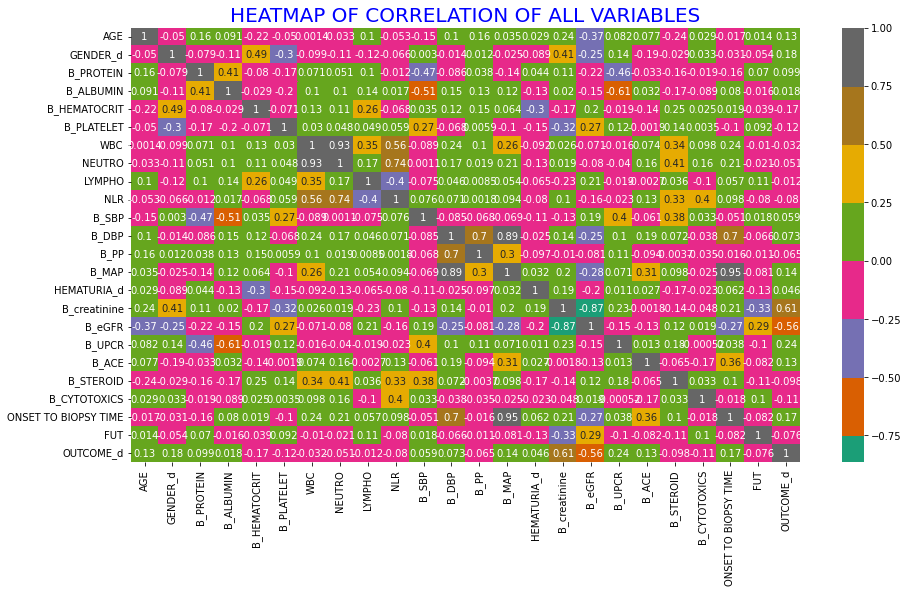

In [ ]:
#plotting the correlation of all variables 
plt.figure(figsize = (15,8))
sns.heatmap(df2.corr(), annot = True, center = 0, cmap = 'Dark2')
plt.title('HEATMAP OF CORRELATION OF ALL VARIABLES', color='b', size=20.0)


Text(0.5, 1.0, 'HEATMAP OF COVARIANCE OF ALL VARIABLES')

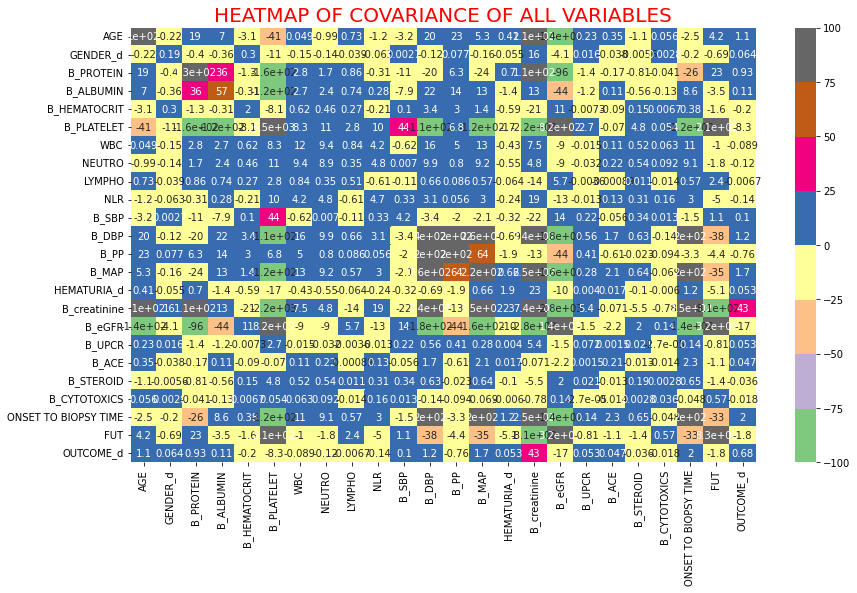

In [ ]:
#plotting the covariance of all variables 
plt.figure(figsize = (14,8))
sns.heatmap(df2.cov(), annot = True, center = 0, vmin = -100, vmax = 100, cmap = 'Accent')
plt.title('HEATMAP OF COVARIANCE OF ALL VARIABLES', color='r', size=20.0)

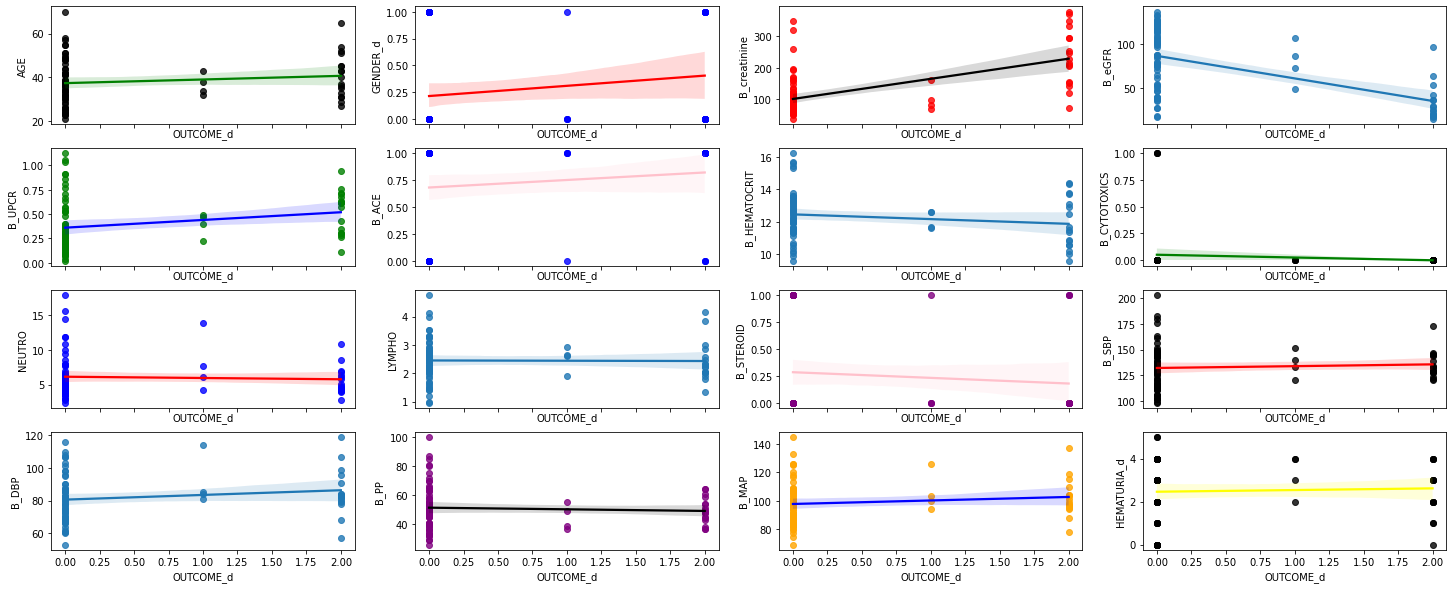

In [ ]:
#This is  regression plot of original dataset over the years
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(25,10), sharex=True)


sns.regplot(data = df2, y = 'AGE', x = 'OUTCOME_d', ax=axs[0,0],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
            
sns.regplot(data = df2, y = 'GENDER_d', x = 'OUTCOME_d', ax=axs[0,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = df2, y = 'B_creatinine', x = 'OUTCOME_d', ax=axs[0,2],
           scatter_kws={"color": "red"}, line_kws={"color": "black"})
sns.regplot(data = df2, y = 'B_eGFR', x = 'OUTCOME_d', ax=axs[0,3])

sns.regplot(data = df2, y = 'B_UPCR', x = 'OUTCOME_d',ax=axs[1,0],
           scatter_kws={"color": "green"}, line_kws={"color": "blue"})
sns.regplot(data = df2, y = 'B_HEMATOCRIT', x = 'OUTCOME_d', ax=axs[1,2])
sns.regplot(data = df2, y = 'B_ACE', x = 'OUTCOME_d', ax=axs[1,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "pink"})
sns.regplot(data = df2, y = 'B_CYTOTOXICS', x = 'OUTCOME_d', ax=axs[1,3],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
sns.regplot(data = df2, y = 'NEUTRO', x = 'OUTCOME_d', ax=axs[2,0],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = df2, y = 'LYMPHO', x = 'OUTCOME_d', ax=axs[2,1])
sns.regplot(data = df2, y = 'B_STEROID', x = 'OUTCOME_d', ax=axs[2,2],
           scatter_kws={"color": "purple"}, line_kws={"color": "pink"})
sns.regplot(data = df2, y = 'B_SBP', x = 'OUTCOME_d', ax=axs[2,3],
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
sns.regplot(data = df2, y = 'B_DBP', x = 'OUTCOME_d', ax=axs[3,0])
sns.regplot(data = df2, y = 'B_PP', x = 'OUTCOME_d', ax=axs[3,1],
           scatter_kws={"color": "purple"}, line_kws={"color": "black"})
sns.regplot(data = df2, y = 'B_MAP', x = 'OUTCOME_d', ax=axs[3,2],
           scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
sns.regplot(data = df2, y = 'HEMATURIA_d', x = 'OUTCOME_d', ax=axs[3,3],
           scatter_kws={"color": "black"}, line_kws={"color": "yellow"})

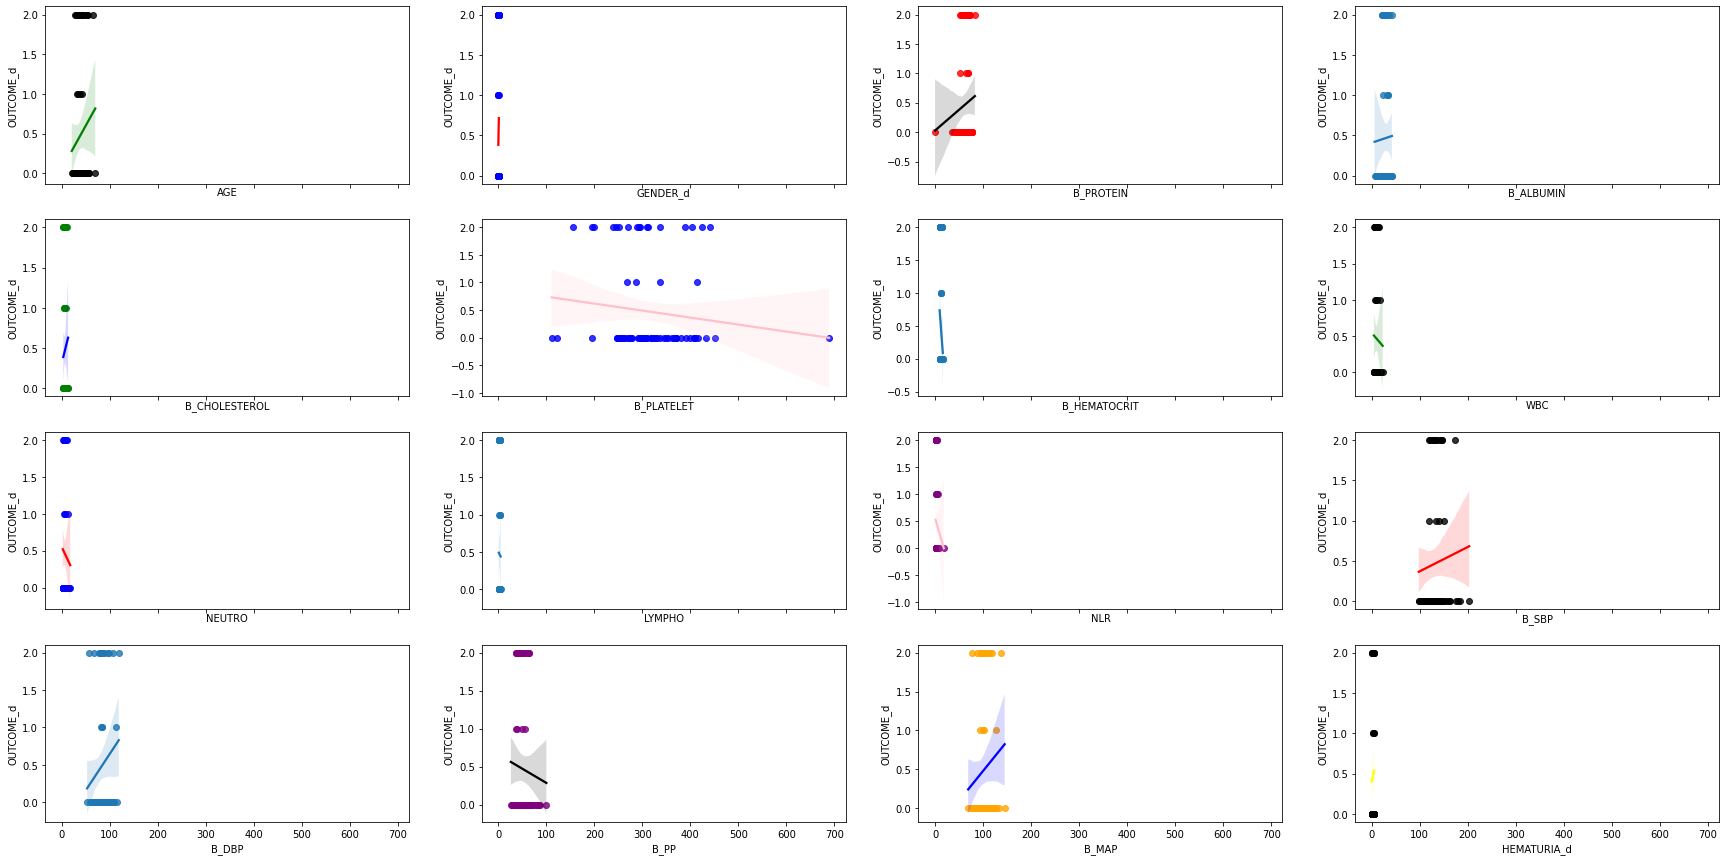

In [ ]:
#This is  regression plot of original dataset over the years
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(30,15), sharex=True)


sns.regplot(data = df2, x = 'AGE', y = 'OUTCOME_d', ax=axs[0,0],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
            
sns.regplot(data = df2, x = 'GENDER_d', y = 'OUTCOME_d', ax=axs[0,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = df2, x = 'B_PROTEIN', y = 'OUTCOME_d', ax=axs[0,2],
           scatter_kws={"color": "red"}, line_kws={"color": "black"})
sns.regplot(data = df2, x = 'B_ALBUMIN', y = 'OUTCOME_d', ax=axs[0,3])

sns.regplot(data = df2, x = 'B_CHOLESTEROL', y = 'OUTCOME_d',ax=axs[1,0],
           scatter_kws={"color": "green"}, line_kws={"color": "blue"})
sns.regplot(data = df2, x = 'B_HEMATOCRIT', y = 'OUTCOME_d', ax=axs[1,2])
sns.regplot(data = df2, x = 'B_PLATELET', y = 'OUTCOME_d', ax=axs[1,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "pink"})
sns.regplot(data = df2, x = 'WBC', y = 'OUTCOME_d', ax=axs[1,3],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
sns.regplot(data = df2, x = 'NEUTRO', y = 'OUTCOME_d', ax=axs[2,0],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = df2, x = 'LYMPHO', y = 'OUTCOME_d', ax=axs[2,1])
sns.regplot(data = df2, x = 'NLR', y = 'OUTCOME_d', ax=axs[2,2],
           scatter_kws={"color": "purple"}, line_kws={"color": "pink"})
sns.regplot(data = df2, x = 'B_SBP', y = 'OUTCOME_d', ax=axs[2,3],
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
sns.regplot(data = df2, x = 'B_DBP', y = 'OUTCOME_d', ax=axs[3,0])
sns.regplot(data = df2, x = 'B_PP', y = 'OUTCOME_d', ax=axs[3,1],
           scatter_kws={"color": "purple"}, line_kws={"color": "black"})
sns.regplot(data = df2, x = 'B_MAP', y = 'OUTCOME_d', ax=axs[3,2],
           scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
sns.regplot(data = df2, x = 'HEMATURIA_d', y = 'OUTCOME_d', ax=axs[3,3],
           scatter_kws={"color": "black"}, line_kws={"color": "yellow"})

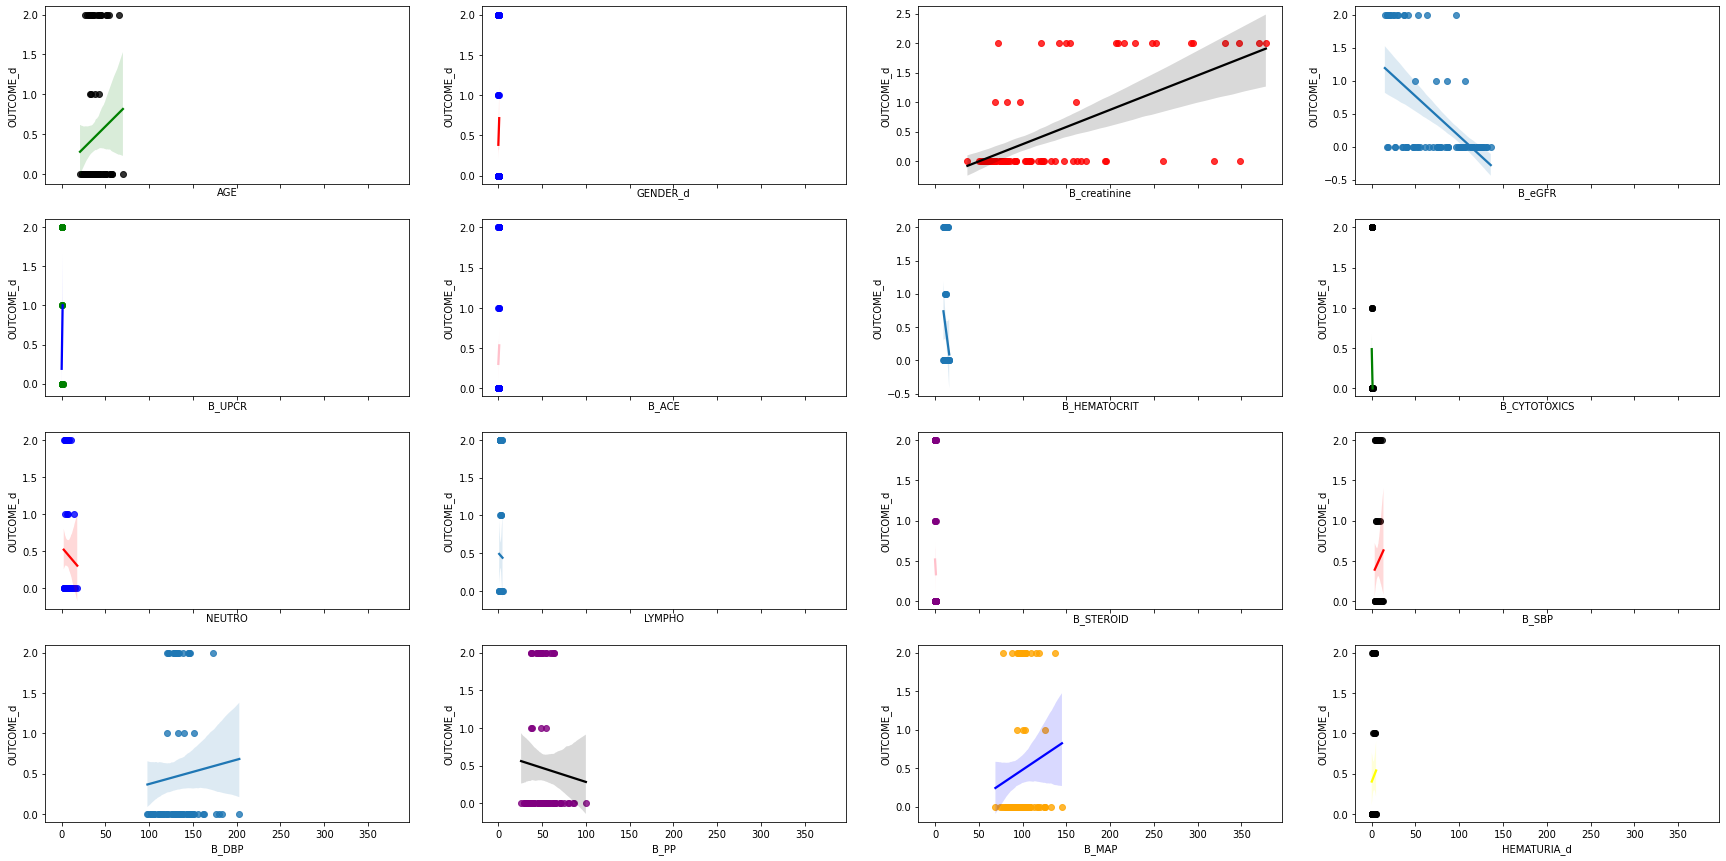

In [ ]:
#This is  regression plot of original dataset over the years
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(30,15), sharex=True)


sns.regplot(data = df2, x = 'AGE', y = 'OUTCOME_d', ax=axs[0,0],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
            
sns.regplot(data = df2, x = 'GENDER_d', y = 'OUTCOME_d', ax=axs[0,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = df2, x = 'B_creatinine', y = 'OUTCOME_d', ax=axs[0,2],
           scatter_kws={"color": "red"}, line_kws={"color": "black"})
sns.regplot(data = df2, x = 'B_eGFR', y = 'OUTCOME_d', ax=axs[0,3])

sns.regplot(data = df2, x = 'B_UPCR', y = 'OUTCOME_d',ax=axs[1,0],
           scatter_kws={"color": "green"}, line_kws={"color": "blue"})
sns.regplot(data = df2, x = 'B_HEMATOCRIT', y = 'OUTCOME_d', ax=axs[1,2])
sns.regplot(data = df2, x = 'B_ACE', y = 'OUTCOME_d', ax=axs[1,1],
           scatter_kws={"color": "blue"}, line_kws={"color": "pink"})
sns.regplot(data = df2, x = 'B_CYTOTOXICS', y = 'OUTCOME_d', ax=axs[1,3],
           scatter_kws={"color": "black"}, line_kws={"color": "green"})
sns.regplot(data = df2, x = 'NEUTRO', y = 'OUTCOME_d', ax=axs[2,0],
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(data = df2, x = 'LYMPHO', y = 'OUTCOME_d', ax=axs[2,1])
sns.regplot(data = df2, x = 'B_STEROID', y = 'OUTCOME_d', ax=axs[2,2],
           scatter_kws={"color": "purple"}, line_kws={"color": "pink"})
sns.regplot(data = df2, x = 'B_SBP', y = 'OUTCOME_d', ax=axs[2,3],
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
sns.regplot(data = df2, x = 'B_DBP', y = 'OUTCOME_d', ax=axs[3,0])
sns.regplot(data = df2, x = 'B_PP', y = 'OUTCOME_d', ax=axs[3,1],
           scatter_kws={"color": "purple"}, line_kws={"color": "black"})
sns.regplot(data = df2, x = 'B_MAP', y = 'OUTCOME_d', ax=axs[3,2],
           scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
sns.regplot(data = df2, x = 'HEMATURIA_d', y = 'OUTCOME_d', ax=axs[3,3],
           scatter_kws={"color": "black"}, line_kws={"color": "yellow"})

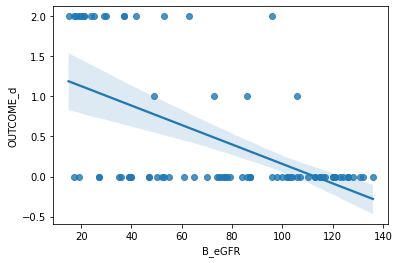

In [ ]:
sns.regplot(data = df2, x = 'B_eGFR', y = 'OUTCOME_d')

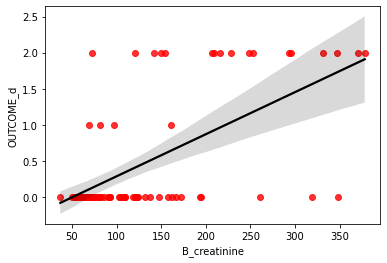

In [ ]:
sns.regplot(data = df2, x = 'B_creatinine', y = 'OUTCOME_d',
           scatter_kws={"color": "red"}, line_kws={"color": "black"})

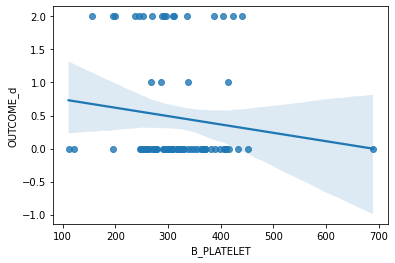

In [ ]:
sns.regplot(data = df2, x = 'B_PLATELET', y = 'OUTCOME_d')

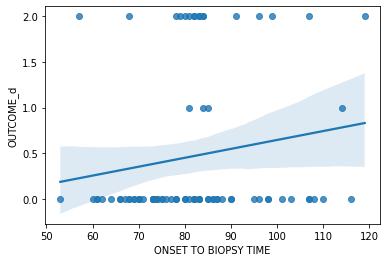

In [ ]:
sns.regplot(data = df2, x = 'ONSET TO BIOPSY TIME', y = 'OUTCOME_d')

In [ ]:
pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'Survival Curve based on FUT estimated with Kaplan-Meier Fitter')

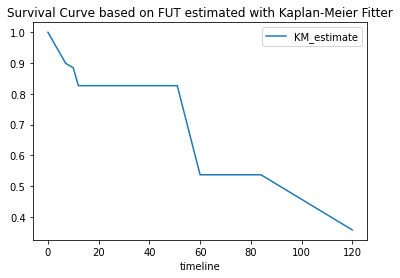

In [ ]:
from lifelines import KaplanMeierFitter
 
# Initiate and fit
kmf = KaplanMeierFitter()
kmf.fit(durations=df2['FUT'], event_observed=df2.OUTCOME_d)
 
# Plot the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve based on FUT estimated with Kaplan-Meier Fitter')


Text(0.5, 1.0, 'Survival Curve estimated with Kaplan-Meier Fitter based on baseline Creatinine')

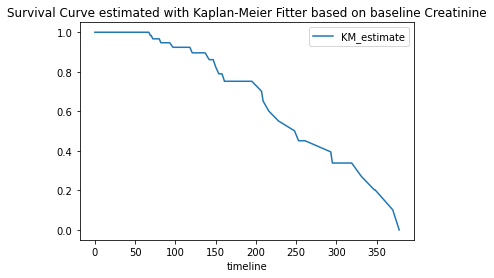

In [ ]:
# Initiate and fit
kmf = KaplanMeierFitter()
kmf.fit(durations=df2.B_creatinine, event_observed=df2.OUTCOME_d)
 
# Plot the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter based on baseline Creatinine')

In [ ]:
# Initiate and fit
kmf = KaplanMeierFitter()
kmf.fit(durations=df2.B_CHOLESTEROL, event_observed=df2.OUTCOME_d)
 
# Plot the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter using basleine cholesterol')

TypeError: ignored

Text(0.5, 1.0, 'Survival Curve estimated with Kaplan-Meier Fitter using baseline platelet')

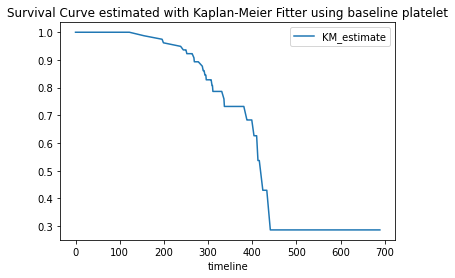

In [ ]:
# Initiate and fit
kmf = KaplanMeierFitter()
kmf.fit(durations=df2.B_PLATELET, event_observed=df2.OUTCOME_d)
 
# Plot the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter using baseline platelet')

Text(0.5, 1.0, 'Survival Curve estimated with Kaplan-Meier Fitter using baseline pulse pressure')

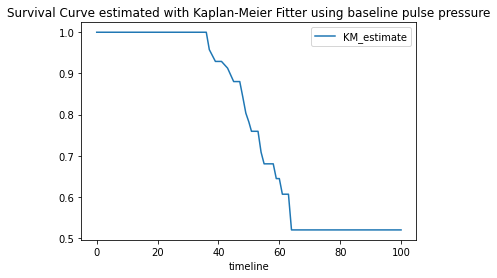

In [ ]:
# Initiate and fit
kmf = KaplanMeierFitter()
kmf.fit(durations=df2.B_PP, event_observed=df2.OUTCOME_d)
 
# Plot the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter using baseline pulse pressure')

Text(0.5, 1.0, 'Survival Curve estimated with Kaplan-Meier Fitter using B_eGFR')

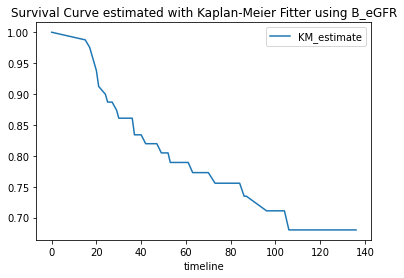

In [ ]:
# Initiate and fit
kmf = KaplanMeierFitter()
kmf.fit(durations=df2.B_eGFR, event_observed=df2.OUTCOME_d)
 
# Plot the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter using B_eGFR')

Text(0.5, 1.0, 'Survival Curve estimated with Kaplan-Meier Fitter using UPCR')

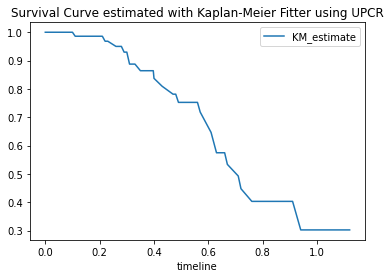

In [ ]:
# Initiate and fit
kmf = KaplanMeierFitter()
kmf.fit(durations= df2.B_UPCR, event_observed=df2.OUTCOME_d)
 
# Plot the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter using UPCR')

Text(0.5, 1.0, 'Survival Curve estimated with Kaplan-Meier Fitter On cytotoxics')

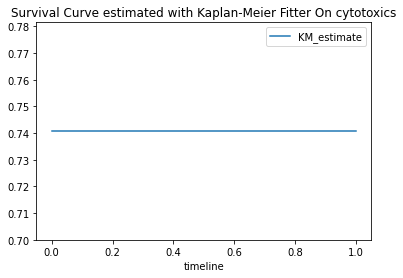

In [ ]:
# Initiate and fit
kmf = KaplanMeierFitter()
kmf.fit(durations=df2.B_CYTOTOXICS, event_observed=df2.OUTCOME_d)
 
# Plot the survival function
kmf.survival_function_.plot()
plt.title('Survival Curve estimated with Kaplan-Meier Fitter On cytotoxics')

In [ ]:
df2.columns

Index(['AGE', 'GENDER_d', 'B_PROTEIN', 'B_ALBUMIN', 'B_CHOLESTEROL',
       'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'NLR', 'B_SBP',
       'B_DBP', 'B_PP', 'B_MAP', 'HEMATURIA_d', 'B_creatinine', 'B_eGFR',
       'B_UPCR', 'B_ACE', 'B_STEROID', 'B_CYTOTOXICS', 'OUTCOME_d'],
      dtype='object')

In [ ]:

import statistics
from sklearn.impute import SimpleImputer
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from scipy import stats

In [ ]:
mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
Columns = ['GENDER_d', 'B_PROTEIN', 'B_ALBUMIN',
       'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'NLR', 'B_SBP',
       'B_DBP', 'B_PP', 'B_MAP', 'HEMATURIA_d', 'B_creatinine', 'B_eGFR',
       'B_UPCR', 'B_ACE', 'B_STEROID', 'B_CYTOTOXICS', 'ONSET TO BIOPSY TIME', 'FUT']
X = mean.fit_transform(df2[Columns])
df_X = pd.DataFrame(X,
                    columns = Columns)
keep = ['AGE', 'OUTCOME_d']
df_keepcolumn = df2[keep]
df = pd.concat([df_keepcolumn, df_X], axis = 1)
df = df.dropna() 
df.isnull().sum()
df.shape

(81, 24)

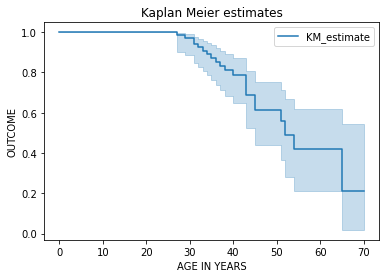

In [ ]:
kmf = KaplanMeierFitter()
X = df2['AGE']
Y = df2['OUTCOME_d']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates")
plt.xlabel("AGE IN YEARS")
plt.ylabel("OUTCOME")
plt.show()

Text(0, 0.5, 'Survival')

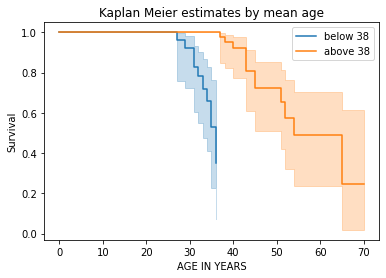

In [ ]:
kmf.survival_function_
age_group = df2['AGE'] < statistics.median(df2['AGE'])
ax = plt.subplot(111)
kmf.fit(X[age_group], event_observed = Y[age_group], label = 'below 38')
kmf.plot(ax = ax)
kmf.fit(X[~age_group], event_observed = Y[~age_group], label = 'above 38')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean age")
plt.xlabel("AGE IN YEARS")
plt.ylabel("Survival")


In [ ]:
df2.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


AGE                      38.185185
GENDER_d                  0.259259
B_PROTEIN                62.639344
B_ALBUMIN                30.074074
B_HEMATOCRIT             12.322222
B_PLATELET              317.234568
WBC                       9.551481
NEUTRO                    6.042346
LYMPHO                    2.446049
NLR                       2.716816
B_SBP                     6.689219
B_DBP                   132.787500
B_PP                     50.850000
B_MAP                    98.850000
HEMATURIA_d               2.493827
B_creatinine            130.925926
B_eGFR                   74.296296
B_UPCR                    0.397375
B_ACE                     0.716049
B_STEROID                 0.259259
B_CYTOTOXICS              0.037037
ONSET TO BIOPSY TIME     81.937500
FUT                      32.802469
OUTCOME_d                 0.469136
dtype: float64

Text(0, 0.5, 'Survival')

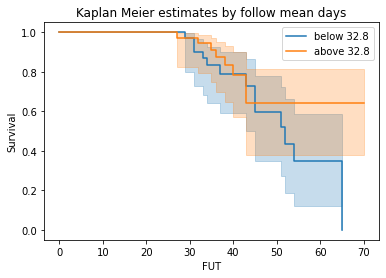

In [ ]:
kmf.survival_function_
FUT_MEAN = df2['FUT'] < statistics.median(df2['FUT'])
ax = plt.subplot(111)
kmf.fit(X[FUT_MEAN], event_observed = Y[FUT_MEAN], label = 'below 32.8')
kmf.plot(ax = ax)
kmf.fit(X[~FUT_MEAN], event_observed = Y[~FUT_MEAN], label = 'above 32.8')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by follow mean days")
plt.xlabel("FUT")
plt.ylabel("Survival")

Text(0, 0.5, 'Survival')

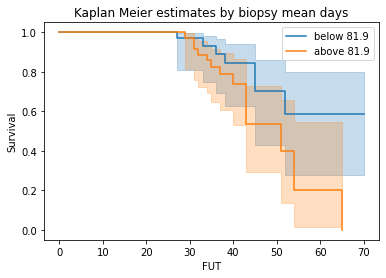

In [ ]:
kmf.survival_function_
biopsy = df2['ONSET TO BIOPSY TIME'] < statistics.mean(df2['ONSET TO BIOPSY TIME'])
ax = plt.subplot(111)
kmf.fit(X[biopsy], event_observed = Y[biopsy], label = 'below 81.9')
kmf.plot(ax = ax)
kmf.fit(X[~biopsy], event_observed = Y[~biopsy], label = 'above 81.9')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by biopsy mean days")
plt.xlabel("FUT")
plt.ylabel("Survival")

In [ ]:
print(kmf.survival_function_)

          above 81.9
timeline            
0.0         1.000000
21.0        1.000000
24.0        1.000000
25.0        1.000000
26.0        1.000000
29.0        0.971429
31.0        0.914286
32.0        0.885714
34.0        0.857143
35.0        0.822857
37.0        0.788571
38.0        0.788571
40.0        0.736000
42.0        0.736000
43.0        0.535273
44.0        0.535273
46.0        0.535273
49.0        0.535273
50.0        0.535273
51.0        0.401455
54.0        0.200727
65.0        0.000000


Text(0, 0.5, 'Survival')

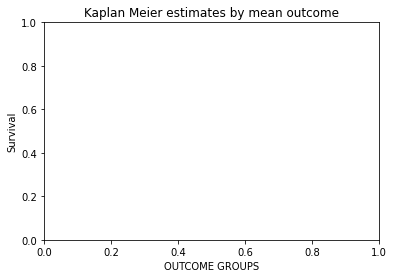

In [ ]:
kmf.survival_function_
OUTCOME_GROUP = df2['B_eGFR'] < statistics.mean(df2['B_eGFR'])
#ax = plt.subplot(111)
kmf.fit(X[OUTCOME_GROUP], event_observed = Y[OUTCOME_GROUP], label = 'below mean')
kmf.plot(ax = ax)
kmf.fit(X[~OUTCOME_GROUP], event_observed = Y[~OUTCOME_GROUP], label = 'above mean')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by mean outcome")
plt.xlabel("OUTCOME GROUPS")
plt.ylabel("Survival")


In [ ]:
df2['B_eGFR'].describe()

count     81.000000
mean      74.296296
std       37.617963
min       15.000000
25%       39.000000
50%       77.000000
75%      107.000000
max      136.000000
Name: B_eGFR, dtype: float64

In [ ]:
df2

,AGE,GENDER_d,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,...,B_PP,B_MAP,HEMATURIA_d,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,OUTCOME_d
0,40,0,71.000000,35,3.780000,12.5,311,11.9,6.33,2.87,...,43.0,110.0,0,121,53,0.11,1,0,0,2
1,38,0,68.000000,33,6.689219,11.7,413,10.7,7.74,1.91,...,39.0,94.0,3,82,86,0.40,0,0,0,1
2,38,0,63.000000,35,6.689219,12.1,433,13.1,10.90,1.40,...,46.0,118.0,0,74,98,0.26,1,1,0,0
3,41,0,73.000000,39,6.970000,13.3,365,15.9,11.90,3.09,...,54.0,96.0,0,59,120,0.14,0,1,0,0
4,34,1,50.000000,20,8.650000,13.2,310,7.3,3.97,2.52,...,53.0,100.0,0,76,124,0.63,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,34,1,62.639344,39,5.080000,15.4,262,9.5,5.22,3.52,...,56.0,107.0,3,121,70,0.20,0,0,0,0
77,31,0,54.000000,22,9.650000,10.9,388,7.0,4.13,2.04,...,37.0,119.0,3,207,29,0.94,1,1,0,2
78,38,0,73.000000,33,6.120000,12.7,273,8.3,4.04,3.32,...,55.0,101.0,0,90,74,0.17,1,0,0,0
79,24,0,62.639344,38,4.280000,12.8,399,9.4,6.48,2.17,...,60.0,89.0,3,67,115,0.18,1,0,0,0


In [ ]:
df2.OUTCOME_d

0     2
1     1
2     0
3     0
4     0
     ..
76    0
77    2
78    0
79    0
80    0
Name: OUTCOME_d, Length: 81, dtype: int64

In [ ]:
df2["OUTCOME_d"] = pd.to_numeric(df["OUTCOME_d"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print(kmf.survival_function_)

          above 38
timeline          
0.0       1.000000
37.0      0.976744
38.0      0.952326
39.0      0.952326
40.0      0.920581
41.0      0.920581
42.0      0.920581
43.0      0.805509
44.0      0.805509
45.0      0.720718
46.0      0.720718
48.0      0.720718
49.0      0.720718
50.0      0.720718
51.0      0.655198
52.0      0.573299
54.0      0.491399
55.0      0.491399
57.0      0.491399
58.0      0.491399
65.0      0.245699
70.0      0.245699


In [ ]:
mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
Columns = ['GENDER_d', 'B_PROTEIN', 'B_ALBUMIN', 'B_CHOLESTEROL',
       'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'NLR', 'B_SBP',
       'B_DBP', 'B_PP', 'B_MAP', 'HEMATURIA_d', 'B_creatinine', 'B_eGFR',
       'B_UPCR', 'B_ACE', 'B_STEROID', 'B_CYTOTOXICS']
X = mean.fit_transform(df2[Columns])
df_X = pd.DataFrame(X,
                    columns = Columns)
keep = ['B_creatinine', 'OUTCOME_d']
df_keepcolumn = df2[keep]
df = pd.concat([df_keepcolumn, df_X], axis = 1)
df = df.dropna() 
df.isnull().sum()
df.shape

(81, 23)

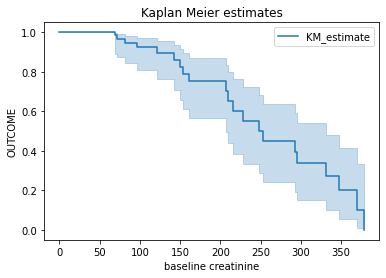

In [ ]:
kmf = KaplanMeierFitter()
X = df2['B_creatinine']
Y = df2['OUTCOME_d']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates")
plt.xlabel("baseline creatinine")
plt.ylabel("OUTCOME")

Text(0, 0.5, 'OUTCOME')

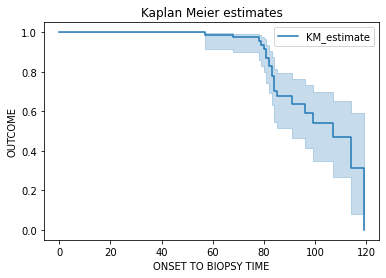

In [ ]:
kmf = KaplanMeierFitter()
X = df2['ONSET TO BIOPSY TIME']
Y = df2['OUTCOME_d']
kmf.fit(X, event_observed = Y)
kmf.plot()
plt.title("Kaplan Meier estimates")
plt.xlabel("ONSET TO BIOPSY TIME")
plt.ylabel("OUTCOME")

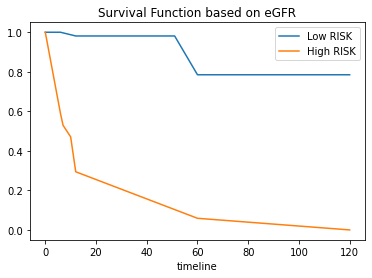

In [ ]:
# Define the low and high satisfaction
High = (df2.OUTCOME_d == 2) 
 
Low = ((df2.OUTCOME_d == 0) | (df2.OUTCOME_d == 1))
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df2[Low].FUT,
event_observed=df2[Low].OUTCOME_d, label='Low RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df2[High].FUT, event_observed=df2[High].OUTCOME_d, label='High RISK')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on eGFR')
plt.show()

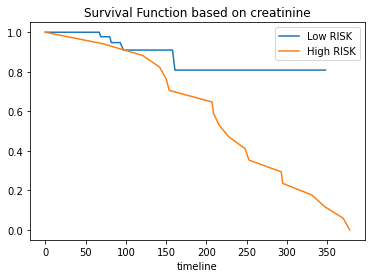

In [ ]:
# Define the low and high satisfaction
High = (df2.OUTCOME_d == 2) 
 
Low = ((df2.OUTCOME_d == 0) | (df2.OUTCOME_d == 1))
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df2[Low].B_creatinine,
event_observed=df2[Low].OUTCOME_d, label='Low RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df2[High].B_creatinine, event_observed=df2[High].OUTCOME_d, label='High RISK')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on creatinine')
plt.show()

Text(0.5, 1.0, 'Survival Function based on FUT')

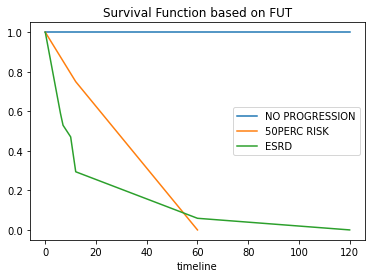

In [ ]:
# Define the low and high satisfaction
High = (df2.OUTCOME_d == 2) 

Med  = (df2.OUTCOME_d == 1)
 
Low = (df2.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df2[Low].FUT,
event_observed=df2[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df2[Med].FUT, event_observed=df2[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df2[High].FUT, event_observed=df2[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on FUT')


Text(0.5, 1.0, 'Survival Function based on eGFR')

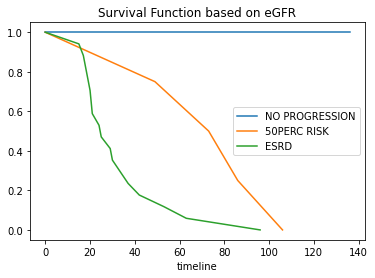

In [ ]:
# Define the low and high satisfaction
High = (df2.OUTCOME_d == 2) 

Med  = (df2.OUTCOME_d == 1)
 
Low = (df2.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df2[Low].B_eGFR,
event_observed=df2[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df2[Med].B_eGFR, event_observed=df2[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df2[High].B_eGFR, event_observed=df2[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on eGFR')

Text(0.5, 1.0, 'Survival Function based on age')

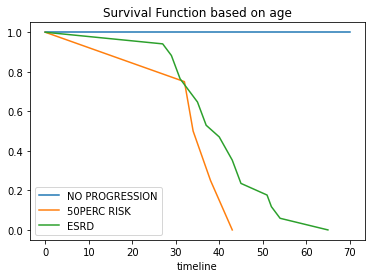

In [ ]:
# Define the low and high satisfaction
High = (df2.OUTCOME_d == 2) 

Med  = (df2.OUTCOME_d == 1)
 
Low = (df2.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df2[Low].AGE,
event_observed=df2[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df2[Med].AGE, event_observed=df2[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df2[High].AGE, event_observed=df2[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on age')

In [174]:
df2['biopsy'] = df2['ONSET TO BIOPSY TIME']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Survival Function based on biopsy time')

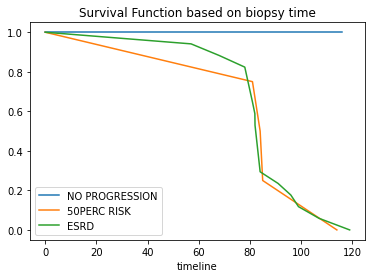

In [175]:
# Define the low and high satisfaction
High = (df2.OUTCOME_d == 2) 

Med  = (df2.OUTCOME_d == 1)
 
Low = (df2.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df2[Low].biopsy,
event_observed=df2[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df2[Med].biopsy, event_observed=df2[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df2[High].biopsy, event_observed=df2[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on biopsy time')

In [ ]:
df2

,AGE,GENDER_d,B_PROTEIN,B_ALBUMIN,B_CHOLESTEROL,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,NLR,B_SBP,B_DBP,B_PP,B_MAP,HEMATURIA_d,B_creatinine,B_eGFR,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,ONSET TO BIOPSY TIME,FUT,OUTCOME_d,biopsy
0,40,0,71.000000,35,30,12.5,311,11.9,6.33,2.87,2.2,3.780000,139.0,43.0,110.0,0,121,53,0.11,1,0,0,96.0,120,2,96.0
1,38,0,68.000000,33,36,11.7,413,10.7,7.74,1.91,4.1,6.689219,120.0,39.0,94.0,3,82,86,0.40,0,0,0,81.0,60,1,81.0
2,38,0,63.000000,35,9,12.1,433,13.1,10.90,1.40,7.8,6.689219,149.0,46.0,118.0,0,74,98,0.26,1,1,0,103.0,48,0,103.0
3,41,0,73.000000,39,10,13.3,365,15.9,11.90,3.09,3.9,6.970000,132.0,54.0,96.0,0,59,120,0.14,0,1,0,78.0,120,0,78.0
4,34,1,50.000000,20,5,13.2,310,7.3,3.97,2.52,1.6,8.650000,135.0,53.0,100.0,0,76,124,0.63,0,0,1,82.0,120,0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,34,1,62.639344,39,12,15.4,262,9.5,5.22,3.52,1.5,5.080000,144.0,56.0,107.0,3,121,70,0.20,0,0,0,88.0,21,0,88.0
77,31,0,54.000000,22,40,10.9,388,7.0,4.13,2.04,2.0,9.650000,144.0,37.0,119.0,3,207,29,0.94,1,1,0,107.0,10,2,107.0
78,38,0,73.000000,33,44,12.7,273,8.3,4.04,3.32,1.2,6.120000,138.0,55.0,101.0,0,90,74,0.17,1,0,0,83.0,18,0,83.0
79,24,0,62.639344,38,12,12.8,399,9.4,6.48,2.17,3.0,4.280000,129.0,60.0,89.0,3,67,115,0.18,1,0,0,69.0,43,0,69.0


In [163]:
from lifelines import CoxPHFitter
## My objective here is to introduce you to the implementation of the model.Thus taking subset of the columns to train the model.
## Only using the subset of the columns present in the original data
df_r= df2.loc[:,['FUT', 'OUTCOME_d', 'AGE','GENDER_d', 'B_PROTEIN', 'B_ALBUMIN', 'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'NLR', 'B_SBP',
                 'B_DBP', 'B_PP', 'B_MAP','B_PLATELET','HEMATURIA_d', 'B_creatinine', 'B_UPCR', 'B_ACE', 'B_STEROID', 'B_CYTOTOXICS', 'B_eGFR', 'biopsy']]
df_r.head() ## have a look at the data

,FUT,OUTCOME_d,AGE,GENDER_d,B_PROTEIN,B_ALBUMIN,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,NLR,B_SBP,B_DBP,B_PP,B_MAP,B_PLATELET,HEMATURIA_d,B_creatinine,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,B_eGFR,biopsy
0,120,2,40,0,71.0,35,12.5,311,11.9,6.33,2.87,2.2,3.780000,139.0,43.0,110.0,311,0,121,0.11,1,0,0,53,96.0
1,60,1,38,0,68.0,33,11.7,413,10.7,7.74,1.91,4.1,6.689219,120.0,39.0,94.0,413,3,82,0.40,0,0,0,86,81.0
2,48,0,38,0,63.0,35,12.1,433,13.1,10.90,1.40,7.8,6.689219,149.0,46.0,118.0,433,0,74,0.26,1,1,0,98,103.0
3,120,0,41,0,73.0,39,13.3,365,15.9,11.90,3.09,3.9,6.970000,132.0,54.0,96.0,365,0,59,0.14,0,1,0,120,78.0
4,120,0,34,1,50.0,20,13.2,310,7.3,3.97,2.52,1.6,8.650000,135.0,53.0,100.0,310,0,76,0.63,0,0,1,124,82.0


In [164]:
## Create dummy variables
df_dummy = pd.get_dummies(df_r, drop_first=True)
df_dummy.head()

,FUT,OUTCOME_d,AGE,GENDER_d,B_PROTEIN,B_ALBUMIN,B_HEMATOCRIT,B_PLATELET,WBC,NEUTRO,LYMPHO,NLR,B_SBP,B_DBP,B_PP,B_MAP,B_PLATELET,HEMATURIA_d,B_creatinine,B_UPCR,B_ACE,B_STEROID,B_CYTOTOXICS,B_eGFR,biopsy
0,120,2,40,0,71.0,35,12.5,311,11.9,6.33,2.87,2.2,3.780000,139.0,43.0,110.0,311,0,121,0.11,1,0,0,53,96.0
1,60,1,38,0,68.0,33,11.7,413,10.7,7.74,1.91,4.1,6.689219,120.0,39.0,94.0,413,3,82,0.40,0,0,0,86,81.0
2,48,0,38,0,63.0,35,12.1,433,13.1,10.90,1.40,7.8,6.689219,149.0,46.0,118.0,433,0,74,0.26,1,1,0,98,103.0
3,120,0,41,0,73.0,39,13.3,365,15.9,11.90,3.09,3.9,6.970000,132.0,54.0,96.0,365,0,59,0.14,0,1,0,120,78.0
4,120,0,34,1,50.0,20,13.2,310,7.3,3.97,2.52,1.6,8.650000,135.0,53.0,100.0,310,0,76,0.63,0,0,1,124,82.0


Text(0.5, 1.0, 'Survival Function based on biopsy time')

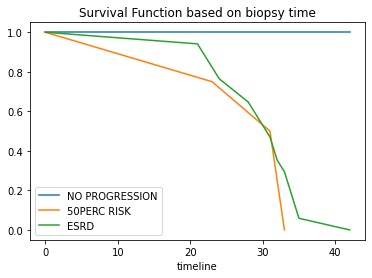

In [181]:
# Define the low and high satisfaction
High = (df2.OUTCOME_d == 2) 

Med  = (df2.OUTCOME_d == 1)
 
Low = (df2.OUTCOME_d == 0) 
 
# Plot the survival function
ax = plt.subplot()
 
kmf = KaplanMeierFitter()
kmf.fit(durations=df2[Low].B_ALBUMIN,
event_observed=df2[Low].OUTCOME_d, label='NO PROGRESSION')
kmf.survival_function_.plot(ax=ax)

kmf.fit(durations=df2[Med].B_ALBUMIN, event_observed=df2[Med].OUTCOME_d, label='50PERC RISK')
kmf.survival_function_.plot(ax=ax)
 
kmf.fit(durations=df2[High].B_ALBUMIN, event_observed=df2[High].OUTCOME_d, label='ESRD')
kmf.survival_function_.plot(ax=ax)
 
plt.title('Survival Function based on biopsy time')

In [182]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [183]:
df_binary = df2[['OUTCOME_d', 'biopsy']]
  
# Taking only the selected two attributes from the dataset
df_binary.columns = ['OUTCOME_d', 'biopsy']
#display the first 5 rows
df_binary.head()

,OUTCOME_d,biopsy
0,2,96.0
1,1,81.0
2,0,103.0
3,0,78.0
4,0,82.0


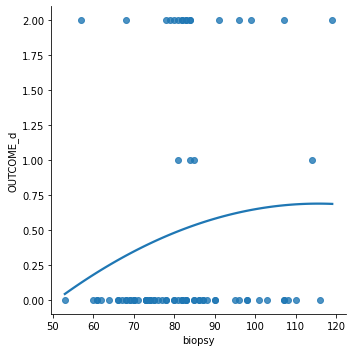

In [186]:

#plotting the Scatter plot to check relationship between Sal and Temp
sns.lmplot(y ="OUTCOME_d", x ="biopsy", data = df_binary, order = 2, ci = None)

In [192]:
X = np.array(df_binary['OUTCOME_d']).reshape(-1, 1)
y = np.array(df_binary['biopsy']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


0.016344807516362247

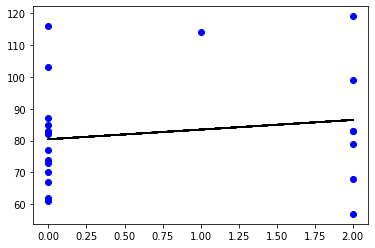

In [193]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

In [194]:
#At last, we check the performance of the Linear Regression model with help of evaluation metrics. 
#For Regression algorithms we widely use mean_absolute_error, and mean_squared_error metrics to check the model performance. 
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 13.828660815862182
MSE: 304.79035698893233
RMSE: 17.458246102885948


In [ ]:
df2.columns

Index(['AGE', 'GENDER_d', 'B_PROTEIN', 'B_ALBUMIN', 'B_CHOLESTEROL',
       'B_HEMATOCRIT', 'B_PLATELET', 'WBC', 'NEUTRO', 'LYMPHO', 'NLR', 'B_SBP',
       'B_DBP', 'B_PP', 'B_MAP', 'HEMATURIA_d', 'B_creatinine', 'B_eGFR',
       'B_UPCR', 'B_ACE', 'B_STEROID', 'B_CYTOTOXICS', 'ONSET TO BIOPSY TIME',
       'FUT', 'OUTCOME_d', 'biopsy'],
      dtype='object')